In [1]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem
from pymoo.factory import get_termination
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation
from pymoo.optimize import minimize
 
#definition of the problem
class MyProblem(ElementwiseProblem):
     
    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_constr=2,
                         xl=np.array([-2,-2]),
                         xu=np.array([2,2]))
 
    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 100 * (x[0]**2 + x[1]**2)
        f2 = (x[0]-1)**2 + x[1]**2
 
        g1 = 2*(x[0]-0.1) * (x[0]-0.9) / 0.18
        g2 = - 20*(x[0]-0.4) * (x[0]-0.6) / 4.8
 
        out["F"] = [f1, f2]
        out["G"] = [g1, g2]
 
problem = MyProblem()
 
#parameters
algorithm = NSGA2(
    pop_size=40,
    n_offsprings=10,
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=15),
    mutation=get_mutation("real_pm", eta=20),
    eliminate_duplicates=True
)
 
#termination criteria
termination = get_termination("n_gen", 40)
 
#solve problem
res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)
 
#get solutions
X = res.X
F = res.F


n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |      40 |  0.00000E+00 |  2.36399E+01 |       1 |            - |            -
    2 |      50 |  0.00000E+00 |  1.15486E+01 |       1 |  0.00000E+00 |            f
    3 |      60 |  0.00000E+00 |  5.277918607 |       1 |  0.00000E+00 |            f
    4 |      70 |  0.00000E+00 |  2.406068542 |       2 |  1.000000000 |        ideal
    5 |      80 |  0.00000E+00 |  0.908316880 |       3 |  0.869706146 |        ideal
    6 |      90 |  0.00000E+00 |  0.264746300 |       3 |  0.00000E+00 |            f
    7 |     100 |  0.00000E+00 |  0.054063822 |       4 |  0.023775686 |        ideal
    8 |     110 |  0.00000E+00 |  0.003060876 |       5 |  0.127815454 |        ideal
    9 |     120 |  0.00000E+00 |  0.00000E+00 |       6 |  0.085921728 |        ideal
   10 |     130 |  0.00000E+00 |  0.00000E+00 |       7 |  0.015715204 |            f
   11 |     140 |  0.00000E+00 |  0.00000E+00 |       

C:\ProgramData\Anaconda3\lib\site-packages\pymoo\util\normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."



   26 |     290 |  0.00000E+00 |  0.00000E+00 |      40 |  0.000963164 |            f
   27 |     300 |  0.00000E+00 |  0.00000E+00 |      40 |  0.000678243 |            f
   28 |     310 |  0.00000E+00 |  0.00000E+00 |      40 |  0.000815766 |            f
   29 |     320 |  0.00000E+00 |  0.00000E+00 |      40 |  0.001500814 |            f
   30 |     330 |  0.00000E+00 |  0.00000E+00 |      40 |  0.014706442 |        nadir
   31 |     340 |  0.00000E+00 |  0.00000E+00 |      40 |  0.003554320 |        ideal
   32 |     350 |  0.00000E+00 |  0.00000E+00 |      40 |  0.000624123 |            f
   33 |     360 |  0.00000E+00 |  0.00000E+00 |      40 |  0.000203925 |            f
   34 |     370 |  0.00000E+00 |  0.00000E+00 |      40 |  0.001048509 |            f
   35 |     380 |  0.00000E+00 |  0.00000E+00 |      40 |  0.001121103 |            f
   36 |     390 |  0.00000E+00 |  0.00000E+00 |      40 |  0.000664461 |            f
   37 |     400 |  0.00000E+00 |  0.00000E+00 |      

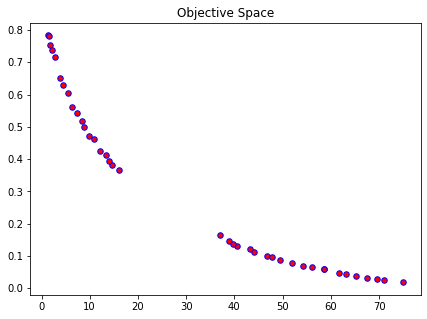

In [4]:
#plotting to view the parreto front
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='red', edgecolors='blue')
plt.title("Objective Space")
plt.show()